In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats
import scipy.stats as stats
import ffn
from factor_analyzer import FactorAnalyzer
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import metrics
%matplotlib inline

## Import Data from Excel Files

### Import historical price data

SP500

In [2]:
sp500 = pd.read_excel('SP500 Prices.xlsx', index_col=0)
sp500.head()

,POOL.OQ,CHRW.OQ,AJG.N,CNP.N,WM.N,BA.N,LIN.N,WY.N,MCD.N,HD.N,...,NRG.N,MKTX.OQ,LMT.N,DLR.N,SCHW.N,DXC.N,SNPS.OQ,J.N,SIVB.OQ,AVY.N
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,19.80,51.87,23.72,16.87,32.26,86.62,87.73,25.177026,58.10,26.11,...,42.82,12.28,105.35,38.50,24.58,17.291048,25.20,96.62,49.91,52.46
2008-01-03,18.76,51.95,23.40,16.68,32.26,86.98,88.49,25.416405,57.93,25.82,...,42.20,12.00,107.93,37.24,24.78,16.467491,24.90,101.58,49.35,51.73
2008-01-04,18.50,49.97,23.24,16.52,31.05,85.82,86.15,24.156146,57.05,24.96,...,41.42,11.77,106.50,35.18,23.88,16.048425,24.75,96.61,48.04,50.38
2008-01-07,18.50,50.62,23.47,16.62,31.57,82.87,86.01,23.983652,58.03,25.37,...,40.19,12.08,106.26,35.07,24.44,15.946391,24.40,91.28,48.37,50.89
2008-01-08,18.50,47.49,23.44,16.70,31.73,79.65,85.65,23.392245,57.11,24.73,...,39.47,10.63,106.17,33.70,22.72,15.334190,23.59,87.86,47.52,48.93


Stoxx

In [3]:
stoxx = pd.read_excel('Stoxx Prices.xlsx', index_col=0)
stoxx.head()

,BOUY.PA,AMPF.MI,GETP.PA,HRGV.L,INGA.AS,BRBY.L,DIAS.MI,SCMN.S,ISP.MI,CABK.MC,...,BPTB.L,KGX.DE,EPIRa.ST,GJFG.OL,NN.AS,ALEP.WA,PRX.AS,EVKn.DE,VNAn.DE,VPLAYb.ST
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,54.91,3.467,9.476604,168.571994,20.049295,566.0,12.826214,NaN,4.972624,4.197624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,53.50,3.370,9.137267,166.220920,19.972507,547.0,12.872046,432.188895,4.984816,4.116901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,52.46,3.337,9.186926,165.515598,19.649998,528.5,12.872046,423.734106,4.947301,4.116901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07,52.39,3.212,8.690335,163.869846,19.680713,505.0,12.716996,427.464160,4.941674,3.995816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08,54.00,3.127,8.673782,157.757054,19.611604,500.5,12.808661,432.934905,4.861954,4.036177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Import ESG Data from Excel

### SP500

Import ESG, E, S, G Scores from Excel and save them as individual dataframes

In [4]:
xlsx = pd.read_excel('ESG Scores SP500.xlsx', sheet_name=None)

# Iterate through the sheets
for sheet_name, df in xlsx.items():
    
    df.drop(df.columns[0], axis = 1, inplace = True)
    df['financial_years'] = pd.date_range(start='12/31/2006', end= '12/31/2021', freq = 'Y')[::-1]
    df.set_index(df['financial_years'], inplace = True)
    df = df.drop('financial_years', axis=1)
    df = df.drop(df.index[-2:],axis=0)
    df = df.iloc[::-1]
    
    # Save the DataFrame with the sheet name as the DataFrame's name
    globals()[sheet_name] = df
    
    print(sheet_name) 

esg_sp500
e_sp500
s_sp500
g_sp500


In [5]:
esg_sp500

,POOL.OQ,CHRW.OQ,AJG.N,CNP.N,AMCR.N,WM.N,BA.N,FOX.OQ,LIN.N,WY.N,...,MKTX.OQ,LMT.N,DLR.N,PSX.N,SCHW.N,DXC.N,SNPS.OQ,J.N,SIVB.OQ,AVY.N
financial_years,,,,,,,,,,,,,,,,,,,,,
2008-12-31,NaN,14.775380,NaN,31.647128,56.504777,66.424191,37.964934,NaN,79.327820,57.670610,...,NaN,29.300023,NaN,NaN,41.872324,16.648053,32.743284,31.028037,NaN,62.335496
2009-12-31,NaN,10.858237,45.738110,35.690489,68.734258,61.310201,34.266025,NaN,82.758046,47.996071,...,NaN,59.206683,41.683177,NaN,56.311949,20.426854,34.861224,47.092095,NaN,53.528433
2010-12-31,NaN,10.313179,42.276186,33.165331,71.393803,73.429332,52.672652,NaN,73.195877,74.408111,...,NaN,63.646637,34.870980,NaN,42.894134,35.896583,49.242519,51.205795,NaN,74.377903
2011-12-31,NaN,21.106397,47.536599,24.640524,65.007756,41.137189,69.421724,NaN,71.896287,85.666613,...,NaN,49.038371,38.275868,NaN,52.800376,49.109828,44.491083,54.737520,NaN,78.470249
2012-12-31,NaN,23.971203,45.945037,37.855643,61.343535,76.332789,50.378255,NaN,68.329035,88.069742,...,NaN,63.523874,33.643207,NaN,40.453591,32.465985,37.357416,66.993827,NaN,73.981251
2013-12-31,NaN,24.016550,50.719544,38.141841,68.867599,44.723821,34.972639,NaN,66.510914,80.478933,...,NaN,43.924940,37.823436,33.504933,45.180528,44.964258,36.008646,61.645786,NaN,67.491583
2014-12-31,NaN,20.812723,50.027557,34.377296,68.457767,68.905601,42.291747,NaN,68.413773,87.812958,...,NaN,49.827855,34.872342,36.134911,42.815385,51.283998,35.220617,62.134124,NaN,70.474405
2015-12-31,45.838994,29.478359,51.503442,33.914032,71.314973,79.102772,52.029314,NaN,69.058106,82.136032,...,NaN,71.415083,39.552285,42.184730,46.535849,29.723459,34.665418,55.761942,41.057955,65.011968
2016-12-31,46.617232,33.656258,51.952028,35.268871,74.895170,85.564092,68.234640,NaN,71.332600,86.312902,...,49.137200,74.203644,43.707963,54.597930,50.427916,52.480888,48.733162,60.744956,47.319251,68.473207


### Stoxx 

Import ESG, E, S, G Scores from Excel and save them as individual dataframes

In [6]:
xlsx = pd.read_excel('ESG Scores STOXX.xlsx', sheet_name=None)

# Iterate through the sheets
for sheet_name, df in xlsx.items():
    
    df.drop(df.columns[0], axis = 1, inplace = True)
    df['financial_years'] = pd.date_range(start='12/31/2006', end= '12/31/2021', freq = 'Y')[::-1]
    df.set_index(df['financial_years'], inplace = True)
    df = df.drop('financial_years', axis=1)
    df = df.drop(df.index[-2:],axis=0)
    df = df.iloc[::-1]
    
    # Save the DataFrame with the sheet name as the DataFrame's name
    globals()[sheet_name] = df
    
    print(sheet_name)    

esg_stoxx
e_stoxx
s_stoxx
g_stoxx


In [7]:
esg_stoxx.head()

,BOUY.PA,AMPF.MI,GETP.PA,HRGV.L,INGA.AS,BRBY.L,DIAS.MI,WLN.PA,SINCH.ST,SCMN.S,...,EVKn.DE,BIOX.PA,VNAn.DE,UTDI.DE,VPLAYb.ST,ANDR.VI,MBGn.DE,NG.L,SWECb.ST,ENI.MI
financial_years,,,,,,,,,,,,,,,,,,,,,
2008-12-31,60.351028,NaN,26.921504,9.194289,84.395726,51.670121,NaN,NaN,NaN,67.753871,...,NaN,28.292038,NaN,27.269598,NaN,30.084374,47.783368,53.862596,NaN,80.221234
2009-12-31,68.693973,NaN,48.946927,18.853783,73.359476,48.189077,NaN,NaN,NaN,61.545220,...,NaN,30.144195,NaN,17.715566,NaN,29.686549,45.660114,59.471736,NaN,63.995333
2010-12-31,70.925529,NaN,42.800808,34.587724,77.243785,54.127220,NaN,NaN,NaN,68.195300,...,NaN,44.575745,NaN,12.884452,NaN,53.974724,53.463494,58.146594,NaN,50.582099
2011-12-31,59.769613,NaN,52.534050,41.122222,57.657429,54.228940,NaN,NaN,NaN,68.203012,...,NaN,44.947367,NaN,11.921156,NaN,39.094225,63.006935,41.172764,NaN,84.791791
2012-12-31,57.794933,NaN,52.977016,42.608895,60.943790,47.747723,NaN,NaN,NaN,65.055706,...,NaN,51.426186,NaN,13.836183,NaN,42.431901,54.166116,72.230099,NaN,63.465142


## Calculate performances for all portfolios for SP500

In [8]:
#set percentile according to Bruno et al.
percentile = 0.3

#get length of columns for n of top percentile and worst percentile
n_picks = int(len(sp500.columns)*percentile)

#create empty data frame that will be filled with portfolio returns and cumulative returns
esg_sp500_perf = pd.DataFrame()
e_sp500_perf = pd.DataFrame()
s_sp500_perf = pd.DataFrame()
g_sp500_perf = pd.DataFrame()

#create overall performance portfolio
overall_sp500_perf = pd.DataFrame()

#store esg score data frames and performance dataframes in list, to simultaneously iterate through them
perf_list = [esg_sp500_perf, e_sp500_perf, s_sp500_perf, g_sp500_perf]
esg_list  = [esg_sp500, e_sp500, s_sp500, g_sp500]


for perf_df, esg_df in zip(perf_list, esg_list):
    
   

    for i, row in esg_df.iterrows():

        #from ESG dataframe for index i (each year) take n largest and n smallest scores and convert to list    
        top_list = esg_df[esg_df.loc[i].nlargest(n_picks).index].columns.tolist()
        top_list = [x for x in top_list if x in sp500.columns.to_list()]
        worst_list = esg_df[esg_df.loc[i].nsmallest(n_picks).index].columns.tolist()
        worst_list = [x for x in worst_list if x in sp500.columns.to_list()]

        #set date range to slice sp500 df 
        date_range = pd.date_range(end = i,periods = 2, freq='Y')

        #slice prices dataframe for range of one year (yearly ESG data, portfolios are being rebalanced every year)
        temp_df = sp500.loc[date_range[0]:date_range[1]]
        

        #drop first row  of temp_df because it includes the last end-of-year date
        temp_df = temp_df.iloc[1: , :]

        #create combined list of top and worst
        overall_list = top_list + worst_list

        #get pct_change of daily returns for temp_df
        temp_df = temp_df.pct_change()
            
        #multiply the returns of the shorted stocks by -1    
        temp_df[worst_list] = temp_df[worst_list].mul(-1, axis=0)

        #add new column 'PF Change', which is the portfolio performance (mean of all returns, since equal weighted)
        temp_df['PF Change'] = temp_df.loc[:, overall_list].mean(axis = 1)

        
        #concatenate each year to the perf_df
        perf_df = pd.concat([temp_df, perf_df]).sort_index()

    #calculate portfolio value using cumprod        
    perf_df['PF Value'] = (perf_df['PF Change'] + 1).cumprod()
    
    #drop all columns but last two 
    perf_df = perf_df.iloc[:, -2:]
    
    overall_sp500_perf = pd.concat([overall_sp500_perf, perf_df], axis=1)
    
    print(perf_df.shape)

#rename columns   
new_columns = ['ESG returns', 'ESG Value','E returns', 'E Value','S returns', 'S Value','G returns', 'G Value',]
overall_sp500_perf.columns = [new_columns[i] for i in range(len(overall_sp500_perf.columns))]

overall_sp500_perf

(3522, 2)
(3522, 2)
(3522, 2)
(3522, 2)


,ESG returns,ESG Value,E returns,E Value,S returns,S Value,G returns,G Value
Date,,,,,,,,
2008-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,0.005542,1.005542,0.003622,1.003622,0.002982,1.002982,0.002594,1.002594
2008-01-07,0.006274,1.011851,0.002641,1.006272,0.002840,1.005830,0.004325,1.006931
2008-01-08,0.004449,1.016352,0.002915,1.009205,0.003233,1.009082,0.002291,1.009238
2008-01-09,-0.000547,1.015797,0.000940,1.010153,-0.000048,1.009034,0.001507,1.010759
...,...,...,...,...,...,...,...,...
2021-12-27,0.002518,0.867292,-0.000253,0.693817,0.000598,0.791033,0.002607,0.944201
2021-12-28,-0.000387,0.866956,0.001427,0.694806,-0.000055,0.790989,-0.000378,0.943845
2021-12-29,0.000961,0.867788,0.000005,0.694810,-0.000308,0.790746,0.000575,0.944387


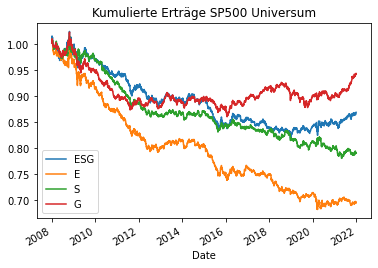

In [9]:
overall_sp500_perf[['ESG Value', 'E Value', 'S Value', 'G Value']].plot(title = 'Kumulierte Erträge SP500 Universum', xlabel = None)
plt.legend(['ESG', 'E', 'S', 'G'])

In [10]:
stats = ffn.calc_stats(overall_sp500_perf[['ESG Value', 'E Value', 'S Value', 'G Value']])
stats.display()

Stat                 ESG Value    E Value     S Value     G Value
-------------------  -----------  ----------  ----------  ----------
Start                2008-01-04   2008-01-04  2008-01-04  2008-01-04
End                  2021-12-31   2021-12-31  2021-12-31  2021-12-31
Risk-free rate       0.00%        0.00%       0.00%       0.00%

Total Return         -13.56%      -30.63%     -21.15%     -5.95%
Daily Sharpe         -0.38        -0.87       -0.69       -0.17
Daily Sortino        -0.61        -1.42       -1.13       -0.28
CAGR                 -1.04%       -2.58%      -1.68%      -0.44%
Max Drawdown         -20.10%      -32.51%     -23.18%     -15.94%
Calmar Ratio         -0.05        -0.08       -0.07       -0.03

MTD                  0.57%        0.63%       0.11%       0.20%
3m                   1.36%        0.78%       -0.28%      1.91%
6m                   1.50%        -0.69%      -0.18%      3.40%
YTD                  2.55%        0.44%       -1.22%      4.98%
1Y               

## Calculate performances for all portfolios for Stoxx

In [11]:
#set percentile according to Bruno et al.
percentile = 0.3

#get length of columns for n of top percentile and worst percentile
n_picks = int(len(stoxx.columns)*percentile)

#create empty data frame that will be filled with portfolio returns and cumulative returns
esg_stoxx_perf = pd.DataFrame()
e_stoxx_perf = pd.DataFrame()
s_stoxx_perf = pd.DataFrame()
g_stoxx_perf = pd.DataFrame()

#create overall performance portfolio
overall_stoxx_perf = pd.DataFrame()

#store esg score data frames and performance dataframes in list, to simultaneously iterate through them
perf_list = [esg_stoxx_perf, e_stoxx_perf, s_stoxx_perf, g_stoxx_perf]
esg_list  = [esg_stoxx, e_stoxx, s_stoxx, g_stoxx]


for perf_df, esg_df in zip(perf_list, esg_list):

    for i, row in esg_df.iterrows():

        #from ESG dataframe for index i (each year) take n largest and n smallest scores and convert to list    
        top_list = esg_df[esg_df.loc[i].nlargest(n_picks).index].columns.tolist()
        top_list = [x for x in top_list if x in stoxx.columns.to_list()]
        worst_list = esg_df[esg_df.loc[i].nsmallest(n_picks).index].columns.tolist()
        worst_list = [x for x in worst_list if x in stoxx.columns.to_list()]

        #set date range to slice stoxx df 
        date_range = pd.date_range(end = i,periods = 2, freq='Y')

        #slice prices dataframe for range of one year (yearly ESG data, portfolios are being rebalanced every year)
        temp_df = stoxx.loc[date_range[0]:date_range[1]]

        #drop first row  of temp_df because it includes the last end-of-year date
        temp_df = temp_df.iloc[1: , :]
        
        #create overall list of both top and worst stocks
        overall_list = top_list + worst_list

        #get pct_change of daily returns for temp_df
        temp_df = temp_df.pct_change()
        
        #multiply returns of shorted stocks by -1
        temp_df[worst_list] = temp_df[worst_list].mul(-1, axis=0)

        #add new column 'PF Change', which is the portfolio performance (mean, since equal weighted)
        temp_df['PF Change'] = temp_df.loc[:, overall_list].mean(axis = 1)

        #concatenate each year to the perf_df
        perf_df = pd.concat([temp_df, perf_df]).sort_index()

    #calculate portfolio value using cumprod        
    perf_df['PF Value'] = (perf_df['PF Change'] + 1).cumprod()
    
    #drop all columns but last two 
    perf_df = perf_df.iloc[:, -2:]
    
    overall_stoxx_perf = pd.concat([overall_stoxx_perf, perf_df], axis=1)
    
    print(perf_df.shape)

#rename columns   
new_columns = ['ESG returns', 'ESG Value','E returns', 'E Value','S returns', 'S Value','G returns', 'G Value',]
overall_stoxx_perf.columns = [new_columns[i] for i in range(len(overall_stoxx_perf.columns))]

overall_stoxx_perf

(3582, 2)
(3582, 2)
(3582, 2)
(3582, 2)


,ESG returns,ESG Value,E returns,E Value,S returns,S Value,G returns,G Value
Date,,,,,,,,
2008-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,-0.001440,0.998560,-0.002396,0.997604,-0.000145,0.999855,0.000854,1.000854
2008-01-07,0.003326,1.001881,0.002099,0.999698,0.004970,1.004824,0.004426,1.005283
2008-01-08,0.000119,1.002001,0.000173,0.999871,0.002292,1.007127,-0.000320,1.004962
2008-01-09,0.003407,1.005414,0.001336,1.001208,0.003945,1.011101,0.003801,1.008782
...,...,...,...,...,...,...,...,...
2021-12-27,0.000199,0.805999,-0.000777,0.610303,-0.000180,0.672505,-0.001005,0.682876
2021-12-28,-0.000310,0.805749,0.000131,0.610383,0.000714,0.672985,-0.000767,0.682352
2021-12-29,-0.000065,0.805697,-0.001038,0.609749,-0.002128,0.671552,-0.000271,0.682167


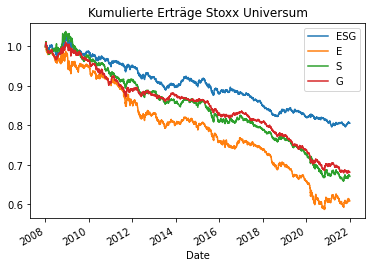

In [12]:
overall_stoxx_perf[['ESG Value', 'E Value', 'S Value', 'G Value']].plot(title = 'Kumulierte Erträge Stoxx Universum')
plt.legend(['ESG', 'E', 'S', 'G'])

In [13]:
stats = ffn.calc_stats(overall_stoxx_perf[['ESG Value', 'E Value', 'S Value', 'G Value']])
stats.display()

Stat                 ESG Value    E Value     S Value     G Value
-------------------  -----------  ----------  ----------  ----------
Start                2008-01-04   2008-01-04  2008-01-04  2008-01-04
End                  2021-12-31   2021-12-31  2021-12-31  2021-12-31
Risk-free rate       0.00%        0.00%       0.00%       0.00%

Total Return         -19.34%      -38.95%     -32.90%     -31.89%
Daily Sharpe         -0.64        -0.90       -0.98       -1.13
Daily Sortino        -1.11        -1.55       -1.68       -1.89
CAGR                 -1.52%       -3.47%      -2.81%      -2.71%
Max Drawdown         -22.19%      -41.39%     -36.44%     -32.80%
Calmar Ratio         -0.07        -0.08       -0.08       -0.08

MTD                  -0.04%       0.43%       0.78%       0.34%
3m                   0.55%        0.70%       0.17%       -0.60%
6m                   -0.06%       -0.85%      -0.97%      -1.79%
YTD                  -0.36%       0.54%       -0.44%      -2.10%
1Y           

# Factor Exposures

### Import Factor data US universe

In [14]:
#Import factors for US
ff_daily_sp500 = pd.read_excel('Factors_NAM_EU.xlsx', sheet_name = 'northam')
ff_daily_sp500.set_index('Date', inplace=True)

#change index to datetime format
ff_daily_sp500.index = pd.to_datetime(ff_daily_sp500.index, format='%Y%m%d')

ff_daily_sp500.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF,WML
Date,,,,,,,
2008-01-01,0.04,0.04,0.02,-0.01,-0.02,0.01,0.09
2008-01-02,-1.25,-0.03,-0.13,0.03,-0.67,0.01,1.03
2008-01-03,-0.04,-0.79,-0.39,-0.05,-0.45,0.01,1.58
2008-01-04,-2.58,-0.43,0.33,-0.05,0.34,0.01,-0.18
2008-01-07,0.03,-0.10,0.25,0.13,1.19,0.01,-1.11


In [15]:
#divide numbers in ff_daily_sp500 by 100 because numbers are in percent
ff_daily_sp500 = ff_daily_sp500.apply(lambda x: x / 100)
ff_daily_sp500.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF,WML
Date,,,,,,,
2008-01-01,0.0004,0.0004,0.0002,-0.0001,-0.0002,0.0001,0.0009
2008-01-02,-0.0125,-0.0003,-0.0013,0.0003,-0.0067,0.0001,0.0103
2008-01-03,-0.0004,-0.0079,-0.0039,-0.0005,-0.0045,0.0001,0.0158
2008-01-04,-0.0258,-0.0043,0.0033,-0.0005,0.0034,0.0001,-0.0018
2008-01-07,0.0003,-0.0010,0.0025,0.0013,0.0119,0.0001,-0.0111


In [16]:
# merge factor data and sp500 performance data of strategies 
ff_CAPM_US = ff_daily_sp500.merge(overall_sp500_perf[['ESG returns', 'E returns', 'S returns', 'G returns']],on='Date')
ff_CAPM_US[:10]

,Mkt-RF,SMB,HML,RMW,CMA,RF,WML,ESG returns,E returns,S returns,G returns
Date,,,,,,,,,,,
2008-01-03,-0.0004,-0.0079,-0.0039,-0.0005,-0.0045,0.0001,0.0158,NaN,NaN,NaN,NaN
2008-01-04,-0.0258,-0.0043,0.0033,-0.0005,0.0034,0.0001,-0.0018,0.005542,0.003622,0.002982,0.002594
2008-01-07,0.0003,-0.0010,0.0025,0.0013,0.0119,0.0001,-0.0111,0.006274,0.002641,0.002840,0.004325
2008-01-08,-0.0169,-0.0036,-0.0096,0.0012,-0.0003,0.0001,0.0105,0.004449,0.002915,0.003233,0.002291
2008-01-09,0.0094,-0.0066,-0.0047,0.0055,0.0023,0.0001,-0.0019,-0.000547,0.000940,-0.000048,0.001507
2008-01-10,0.0083,0.0004,0.0050,-0.0072,0.0009,0.0001,-0.0114,-0.002281,-0.001457,0.000387,-0.003383
2008-01-11,-0.0140,-0.0067,0.0042,-0.0011,-0.0024,0.0001,-0.0049,-0.000949,-0.002032,-0.001088,0.002315
2008-01-14,0.0099,0.0007,0.0000,0.0030,-0.0023,0.0001,0.0027,-0.001090,0.002018,-0.000160,-0.000653
2008-01-15,-0.0246,0.0045,0.0023,-0.0012,0.0074,0.0001,-0.0009,0.000906,-0.001321,-0.001078,-0.000274


In [17]:
# resample to weekly data 
ff_CAPM_US_weekly = ff_CAPM_US.resample('W').last()
ff_CAPM_US_weekly

,Mkt-RF,SMB,HML,RMW,CMA,RF,WML,ESG returns,E returns,S returns,G returns
Date,,,,,,,,,,,
2008-01-06,-0.0258,-0.0043,0.0033,-0.0005,0.0034,0.0001,-0.0018,0.005542,0.003622,0.002982,0.002594
2008-01-13,-0.0140,-0.0067,0.0042,-0.0011,-0.0024,0.0001,-0.0049,-0.000949,-0.002032,-0.001088,0.002315
2008-01-20,-0.0057,-0.0057,-0.0048,0.0063,-0.0037,0.0001,0.0067,-0.002342,-0.000658,-0.001627,-0.002011
2008-01-27,-0.0133,0.0101,0.0014,0.0009,-0.0004,0.0001,0.0065,-0.002357,-0.002806,-0.001666,-0.000810
2008-02-03,0.0153,0.0071,0.0018,-0.0041,-0.0035,0.0001,-0.0085,-0.002895,-0.002713,-0.002920,-0.001961
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-05,-0.0114,-0.0084,0.0169,0.0151,0.0177,0.0000,-0.0114,0.000352,0.001932,0.002290,-0.000549
2021-12-12,0.0068,-0.0098,0.0057,0.0126,0.0094,0.0000,0.0088,-0.000505,0.000323,0.001133,0.000457
2021-12-19,-0.0069,0.0147,-0.0261,-0.0103,-0.0128,0.0000,-0.0144,0.000579,-0.001614,-0.000457,-0.000827


### CAPM Alpha US universe

In [18]:
ff_CAPM_US_weekly.columns[-4:].to_list()

['ESG returns', 'E returns', 'S returns', 'G returns']

In [19]:
OLS_CAPM_US = pd.DataFrame()

for i in ff_CAPM_US_weekly.columns[-4:].to_list():

    X = ff_CAPM_US_weekly['Mkt-RF']
    y = ff_CAPM_US_weekly[i] - ff_CAPM_US_weekly['RF']
    X = sm.add_constant(X)
    ff_model = sm.OLS(y, X, missing = 'drop').fit()
    print(ff_model.summary())
    intercept, b1 = ff_model.params
    
    parameters = pd.concat([ff_model.params, ff_model.tvalues], axis=0, keys=['parameter', 't-value'])
    OLS_CAPM_US = pd.concat([OLS_CAPM_US, parameters], axis=1)
    
OLS_CAPM_US

new_columns = ['ESG', 'E', 'S', 'G']
OLS_CAPM_US.columns = [new_columns[i] for i in range(len(OLS_CAPM_US.columns))]


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     26.55
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           3.31e-07
Time:                        16:00:23   Log-Likelihood:                 3654.9
No. Observations:                 731   AIC:                            -7306.
Df Residuals:                     729   BIC:                            -7297.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.903e-05   6.05e-05     -1.307      0.1

C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [20]:
OLS_CAPM_US

ESG         E         S         G
parameter const  -0.000079 -0.000269 -0.000184 -0.000071
          Mkt-RF  0.027772  0.051330  0.018748  0.029757
t-value   const  -1.307054 -4.163491 -3.581310 -1.328191
          Mkt-RF  5.152386  8.910763  4.097504  6.254945

In [21]:
OLS_CAPM_US.to_excel('OLS_CAPM_US.xlsx')

### 6 Factor Alpha US universe

In [22]:
ols_6_fact = pd.DataFrame()

for i in ff_CAPM_US_weekly.columns[-4:].to_list():
    
    X = ff_CAPM_US_weekly[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']]
    y = ff_CAPM_US_weekly[i] - ff_CAPM_US_weekly['RF']
    X = sm.add_constant(X)
    ff_model = sm.OLS(y, X, missing = 'drop').fit()
    print(ff_model.summary())
    intercept, b1, b2, b3, b4, b5, b6 = ff_model.params
    
    parameters = pd.concat([ff_model.params, ff_model.tvalues], axis=0, keys=['parameter', 't-value'])
    ols_6_fact = pd.concat([ols_6_fact, parameters], axis=1)
    
ols_6_fact

new_columns = ['ESG', 'E', 'S', 'G']
ols_6_fact.columns = [new_columns[i] for i in range(len(ols_6_fact.columns))]

C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     28.01
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           3.63e-30
Time:                        16:00:23   Log-Likelihood:                 3718.1
No. Observations:                 731   AIC:                            -7422.
Df Residuals:                     724   BIC:                            -7390.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -6.7e-05    5.6e-05     -1.196      0.2

C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [23]:
ols_6_fact

ESG          E          S         G
parameter const  -0.000067  -0.000227  -0.000158 -0.000055
          Mkt-RF  0.040022   0.058617   0.028245  0.034195
          SMB    -0.074709  -0.120193  -0.108196 -0.054063
          HML    -0.038827   0.033012  -0.032730  0.004224
          RMW     0.020391   0.034049  -0.051196  0.012372
          CMA     0.150581   0.091349   0.090820  0.062807
          WML    -0.014314  -0.015431  -0.012221 -0.009391
t-value   const  -1.195958  -3.965780  -3.378179 -1.071051
          Mkt-RF  7.616018  10.904393   6.424256  7.038856
          SMB    -6.603183 -10.384981 -11.429901 -5.168795
          HML    -2.797177   2.324850  -2.818270  0.329195
          RMW     1.148455   1.874699  -3.446418  0.753753
          CMA     7.386014   4.380141   5.324426  3.332388
          WML    -1.819761  -1.917856  -1.857072 -1.291448

In [24]:
ols_6_fact.to_excel('ols_6_fact.xlsx')

### Import Factor data EU universe

In [25]:
ff_daily_stoxx = pd.read_excel('Factors_NAM_EU.xlsx', sheet_name = 'europe')
ff_daily_stoxx.set_index('Date', inplace=True)

#change index to datetime format
ff_daily_stoxx.index = pd.to_datetime(ff_daily_stoxx .index, format='%Y%m%d')

ff_daily_stoxx

,Mkt-RF,SMB,HML,RMW,CMA,RF,WML
Date,,,,,,,
2008-01-01,0.02,0.00,0.00,0.00,-0.01,0.01,0.02
2008-01-02,-0.12,0.94,0.20,-0.37,0.18,0.01,0.02
2008-01-03,-0.15,-0.18,0.14,0.01,0.04,0.01,0.43
2008-01-04,-1.75,0.41,0.32,-0.25,0.13,0.01,0.72
2008-01-07,-0.81,-0.97,0.19,0.32,0.50,0.01,0.39
...,...,...,...,...,...,...,...
2022-10-25,2.56,0.21,-1.91,0.80,-1.03,0.01,-2.22
2022-10-26,1.71,0.40,-0.52,0.12,-0.27,0.01,-0.51
2022-10-27,-1.11,0.15,1.53,-0.61,0.60,0.01,0.56


In [26]:
#divide numbers in ff_daily_sstoxx by 100 because numbers are in percent
ff_daily_stoxx = ff_daily_stoxx.apply(lambda x: x / 100)
ff_daily_stoxx.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF,WML
Date,,,,,,,
2008-01-01,0.0002,0.0000,0.0000,0.0000,-0.0001,0.0001,0.0002
2008-01-02,-0.0012,0.0094,0.0020,-0.0037,0.0018,0.0001,0.0002
2008-01-03,-0.0015,-0.0018,0.0014,0.0001,0.0004,0.0001,0.0043
2008-01-04,-0.0175,0.0041,0.0032,-0.0025,0.0013,0.0001,0.0072
2008-01-07,-0.0081,-0.0097,0.0019,0.0032,0.0050,0.0001,0.0039


In [27]:
# merge factor data and stoxx performance data of strategies 
ff_EU = ff_daily_stoxx.merge(overall_stoxx_perf[['ESG returns', 'E returns', 'S returns', 'G returns']],on='Date')
ff_EU.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF,WML,ESG returns,E returns,S returns,G returns
Date,,,,,,,,,,,
2008-01-03,-0.0015,-0.0018,0.0014,0.0001,0.0004,0.0001,0.0043,NaN,NaN,NaN,NaN
2008-01-04,-0.0175,0.0041,0.0032,-0.0025,0.0013,0.0001,0.0072,-0.001440,-0.002396,-0.000145,0.000854
2008-01-07,-0.0081,-0.0097,0.0019,0.0032,0.0050,0.0001,0.0039,0.003326,0.002099,0.004970,0.004426
2008-01-08,0.0072,-0.0062,-0.0062,0.0016,-0.0022,0.0001,0.0007,0.000119,0.000173,0.002292,-0.000320
2008-01-09,-0.0180,-0.0060,0.0013,-0.0024,0.0023,0.0001,0.0012,0.003407,0.001336,0.003945,0.003801


In [28]:
# resample to weekly data 
ff_EU_weekly = ff_EU.resample('W').last()
ff_EU_weekly

,Mkt-RF,SMB,HML,RMW,CMA,RF,WML,ESG returns,E returns,S returns,G returns
Date,,,,,,,,,,,
2008-01-06,-0.0175,0.0041,0.0032,-0.0025,0.0013,0.0001,0.0072,-0.001440,-0.002396,-0.000145,0.000854
2008-01-13,-0.0073,-0.0022,0.0066,-0.0047,-0.0016,0.0001,-0.0116,-0.000091,0.000802,-0.001527,0.001344
2008-01-20,-0.0102,0.0019,-0.0093,0.0044,-0.0003,0.0001,0.0093,-0.002736,-0.002111,-0.002847,-0.002767
2008-01-27,-0.0018,0.0087,-0.0060,0.0035,-0.0007,0.0001,0.0143,-0.000187,-0.001671,-0.000022,-0.002270
2008-02-03,0.0142,-0.0037,-0.0010,0.0021,-0.0038,0.0001,-0.0035,-0.001113,0.000466,-0.002017,-0.000701
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-05,-0.0070,-0.0035,0.0057,-0.0004,0.0050,0.0000,-0.0001,0.001304,0.001322,0.001692,0.002251
2021-12-12,-0.0014,0.0004,0.0045,0.0006,0.0058,0.0000,-0.0006,0.001276,0.002106,0.003264,0.000532
2021-12-19,-0.0131,0.0065,-0.0023,-0.0024,0.0033,0.0000,-0.0147,-0.000114,-0.002032,-0.000673,-0.000695


### CAPM Alpha EU universe

In [29]:
ff_EU_weekly.columns[-4:].to_list()

['ESG returns', 'E returns', 'S returns', 'G returns']

In [30]:
OLS_CAPM_EU = pd.DataFrame()

for i in ff_EU_weekly.columns[-4:].to_list():

    X = ff_EU_weekly['Mkt-RF']
    y = ff_EU_weekly[i] - ff_EU_weekly['RF']
    X = sm.add_constant(X)
    ff_model = sm.OLS(y, X, missing = 'drop').fit()
    print(ff_model.summary())
    intercept, b1 = ff_model.params
    
    
    parameters = pd.concat([ff_model.params, ff_model.tvalues], axis=0, keys=['parameter', 't-value'])
    OLS_CAPM_EU = pd.concat([OLS_CAPM_EU, parameters], axis=1)
    
OLS_CAPM_EU

new_columns = ['ESG', 'E', 'S', 'G']
OLS_CAPM_EU.columns = [new_columns[i] for i in range(len(OLS_CAPM_EU.columns))]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     171.2
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           2.68e-35
Time:                        16:00:24   Log-Likelihood:                 3810.1
No. Observations:                 731   AIC:                            -7616.
Df Residuals:                     729   BIC:                            -7607.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002   4.88e-05     -3.224      0.0

C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [31]:
OLS_CAPM_EU

ESG          E          S          G
parameter const   -0.000157  -0.000306  -0.000297  -0.000213
          Mkt-RF   0.051375   0.113959   0.051431   0.061592
t-value   const   -3.224182  -4.475088  -4.775114  -4.574969
          Mkt-RF  13.085961  20.742873  10.282040  16.486493

In [32]:
OLS_CAPM_EU.to_excel('OLS_CAPM_EU.xlsx')

### 6 Factor Alpha EU universe

In [33]:
ols_6_fact_EU = pd.DataFrame()

for i in ff_EU_weekly.columns[-4:].to_list():

    X = ff_EU_weekly[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']]
    y = ff_EU_weekly[i] - ff_EU_weekly['RF']
    X = sm.add_constant(X)
    ff_model = sm.OLS(y, X, missing = 'drop').fit()
    print(ff_model.summary())
    intercept, b1, b2, b3, b4, b5, b6 = ff_model.params
    
    parameters = pd.concat([ff_model.params, ff_model.tvalues], axis=0, keys=['parameter', 't-value'])
    ols_6_fact_EU = pd.concat([ols_6_fact_EU, parameters], axis=1)
    
ols_6_fact_EU

new_columns = ['ESG', 'E', 'S', 'G']
ols_6_fact_EU.columns = [new_columns[i] for i in range(len(ols_6_fact_EU.columns))]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     87.53
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           2.09e-82
Time:                        16:00:24   Log-Likelihood:                 3932.4
No. Observations:                 731   AIC:                            -7851.
Df Residuals:                     724   BIC:                            -7819.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.773e-05   4.24e-05     -1.127      0.2

C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [34]:
ols_6_fact_EU

ESG          E          S          G
parameter const   -0.000048  -0.000096  -0.000088  -0.000094
          Mkt-RF  -0.001416   0.005578  -0.029417   0.004599
          SMB     -0.174432  -0.242828  -0.256797  -0.141180
          HML      0.044122   0.209098   0.097243   0.076978
          RMW      0.078526   0.041672   0.086923   0.001002
          CMA     -0.007465   0.049839   0.098356   0.047581
          WML      0.009974  -0.010633   0.013664  -0.011971
t-value   const   -1.127074  -2.065330  -1.840051  -2.448994
          Mkt-RF  -0.276346   0.989384  -5.080641   0.989258
          SMB    -16.650450 -21.064581 -21.691071 -14.853840
          HML      2.983964  12.851068   5.819499   5.738084
          RMW      3.911081   1.886164   3.830973   0.054991
          CMA     -0.442085   2.682359   5.154447   3.105941
          WML      1.430563  -1.385979   1.734236  -1.892530

In [35]:
ols_6_fact_EU.to_excel('ols_6_fact_EU.xlsx')

In [36]:
from scipy.stats import gmean

### Factor Returns SP500

In [37]:
factor_list = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']

In [38]:
for i in factor_list:

    column = ff_CAPM_US_weekly[i]

    # Convert the returns to a cumulative return series
    cumulative_returns = (1 + column).cumprod()

    # Calculate the total return
    total_return = (cumulative_returns.iloc[-1] / cumulative_returns.iloc[0]) - 1

    # Calculate the number of years in the period
    start_date = '2008-01-01'
    end_date = '2022-01-02'
    num_years = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days / 365

    # Calculate the annualized return
    annualized_return = (total_return / num_years) * 365
    print(i + " :" + str(annualized_return))

Mkt-RF :11.49452262740116
SMB :8.72474404047024
HML :-2.5159622661833634
RMW :-1.0715235006851418
CMA :-0.10285190863456439
WML :-8.610083011422248


   ### Factor Returns Stoxx

In [39]:
for i in factor_list:

    column = ff_EU_weekly[i]

    # Convert the returns to a cumulative return series
    cumulative_returns = (1 + column).cumprod()

    # Calculate the total return
    total_return = (cumulative_returns.iloc[-1] / cumulative_returns.iloc[0]) - 1

    # Calculate the number of years in the period
    start_date = '2008-01-01'
    end_date = '2022-01-02'
    num_years = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days / 365

    # Calculate the annualized return
    annualized_return = (total_return / num_years) * 365
    print(i + " :" + str(annualized_return))

Mkt-RF :-4.626775315043431
SMB :16.107275614433455
HML :-5.057650476291626
RMW :2.26652417526393
CMA :-5.6727162331915375
WML :-3.886847288445392


# Sector Biases

### Import Sector Files

SP500

In [40]:
sectors_sp500 = pd.read_excel('Sectors_sp500.xlsx')
sectors_sp500.head()

,Instrument,TRBC Economic Sector Name
0,POOL.OQ,Consumer Cyclicals
1,CHRW.OQ,Industrials
2,AJG.N,Financials
3,CNP.N,Utilities
4,WM.N,Industrials


Stoxx

In [41]:
sectors_stoxx = pd.read_excel('Sectors_stoxx.xlsx')
sectors_stoxx.head()

,Instrument,TRBC Economic Sector Name
0,BOUY.PA,Industrials
1,AMPF.MI,Healthcare
2,GETP.PA,Industrials
3,HRGV.L,Financials
4,INGA.AS,Financials


### Calculate Sector Biases

SP500

In [42]:
pd.options.mode.chained_assignment = None

#create empty data frame that will be filled with biases
esg_sp500_bias = pd.DataFrame()
e_sp500_bias = pd.DataFrame()
s_sp500_bias = pd.DataFrame()
g_sp500_bias = pd.DataFrame()

weight_list = [esg_sp500_perf, e_sp500_perf, s_sp500_perf, g_sp500_perf]
esg_list  = [esg_sp500, e_sp500, s_sp500, g_sp500]

#create overall performance portfolio
overall_sp500_bias = pd.DataFrame()

for weight, esg_df in zip(weight_list, esg_list):

    for i, row in esg_df.iterrows():

        #from ESG dataframe for index i take n largest and n smallest scores and convert to list    
        top_list = esg_df[esg_df.loc[i].nlargest(n_picks).index].columns.tolist()
        top_list = [x for x in top_list if x in sp500.columns.to_list()]
        worst_list = esg_df[esg_df.loc[i].nsmallest(n_picks).index].columns.tolist()
        worst_list = [x for x in worst_list if x in sp500.columns.to_list()]

        overall_list = worst_list + top_list

        df_grouped = sectors_sp500.loc[sectors_sp500['Instrument'].isin(overall_list)]
        df_grouped['Weight'] = 1/len(overall_list)


        weight[i] = df_grouped.groupby('TRBC Economic Sector Name')['Weight'].sum()

    weight['Average'] = weight.mean(axis = 1)
    weight.index.name = None
    weight['Bias %'] = (weight['Average'] - 0.1) * 100

    total = weight.abs().sum().round(2)
    total.name = 'Total'
    # Assign sum of all rows of DataFrame as a new Row
    weight = weight.append(total.transpose())

    #drop all columns but last two 
    weight = weight.iloc[:, -2:]

    overall_sp500_bias = pd.concat([overall_sp500_bias, weight], axis=1)
    

#rename columns   
new_columns = ['ESG Average', 'ESG Bias %','E Average', 'E Bias %','S Average', 'S Bias %','G Average', 'G Bias %',]
overall_sp500_bias.columns = [new_columns[i] for i in range(len(overall_sp500_bias.columns))]

overall_sp500_bias

,ESG Average,ESG Bias %,E Average,E Bias %,S Average,S Bias %,G Average,G Bias %
Basic Materials,0.055199,-4.480112,0.051251,-4.874874,0.055631,-4.436929,0.056033,-4.396651
Consumer Cyclicals,0.138753,3.875318,0.145397,4.539741,0.142609,4.260940,0.127154,2.715367
Consumer Non-Cyclicals,0.090129,-0.987058,0.081060,-1.894012,0.081401,-1.859909,0.088714,-1.128620
Energy,0.041779,-5.822056,0.037417,-6.258257,0.041722,-5.827805,0.043586,-5.641425
Financials,0.125966,2.596629,0.147965,4.796542,0.129671,2.967081,0.136742,3.674242
Healthcare,0.118287,1.828666,0.118895,1.889472,0.130107,3.010662,0.121947,2.194690
Industrials,0.140795,4.079495,0.140079,4.007856,0.145208,4.520829,0.133526,3.352598
Real Estate,0.069837,-3.016343,0.064527,-3.547329,0.063161,-3.683898,0.062343,-3.765659
Technology,0.155049,5.504890,0.153913,5.391267,0.154270,5.426996,0.160456,6.045588
Utilities,0.064206,-3.579430,0.059496,-4.050406,0.056220,-4.377966,0.069499,-3.050131


In [43]:
overall_sp500_bias.to_excel('SP500_sector_bias.xlsx')

Stoxx

In [44]:
pd.options.mode.chained_assignment = None

#create empty data frame that will be filled with biases
esg_stoxx_bias = pd.DataFrame()
e_stoxx_bias = pd.DataFrame()
s_stoxx_bias = pd.DataFrame()
g_stoxx_bias = pd.DataFrame()

weight_list = [esg_stoxx_perf, e_stoxx_perf, s_stoxx_perf, g_stoxx_perf]
esg_list  = [esg_stoxx, e_stoxx, s_stoxx, g_stoxx]

#create overall performance portfolio
overall_stoxx_bias = pd.DataFrame()

for weight, esg_df in zip(weight_list, esg_list):

    for i, row in esg_df.iterrows():

        #from ESG dataframe for index i take n largest and n smallest scores and convert to list    
        top_list = esg_df[esg_df.loc[i].nlargest(n_picks).index].columns.tolist()
        top_list = [x for x in top_list if x in stoxx.columns.to_list()]
        worst_list = esg_df[esg_df.loc[i].nsmallest(n_picks).index].columns.tolist()
        worst_list = [x for x in worst_list if x in stoxx.columns.to_list()]

        overall_list = worst_list + top_list

        df_grouped = sectors_stoxx.loc[sectors_stoxx['Instrument'].isin(overall_list)]
        df_grouped['Weight'] = 1/len(overall_list)


        weight[i] = df_grouped.groupby('TRBC Economic Sector Name')['Weight'].sum()

    weight['Average'] = weight.mean(axis = 1)
    weight.index.name = None
    weight['Bias %'] = (weight['Average'] - 0.1) * 100

    total = weight.abs().sum().round(2)
    total.name = 'Total'
    # Assign sum of all rows of DataFrame as a new Row
    weight = weight.append(total.transpose())
    
    #drop all columns but last two 
    weight = weight.iloc[:, -2:]
    
    overall_stoxx_bias = pd.concat([overall_stoxx_bias, weight], axis=1)
    

#rename columns   
new_columns = ['ESG Average', 'ESG Bias %','E Average', 'E Bias %','S Average', 'S Bias %','G Average', 'G Bias %',]
overall_stoxx_bias.columns = [new_columns[i] for i in range(len(overall_stoxx_bias.columns))]

overall_stoxx_bias

,ESG Average,ESG Bias %,E Average,E Bias %,S Average,S Bias %,G Average,G Bias %
Basic Materials,0.110434,1.043436,0.100719,0.071877,0.105386,0.538597,0.109292,0.929177
Consumer Cyclicals,0.140904,4.090427,0.141720,4.171998,0.140648,4.064839,0.139782,3.978248
Consumer Non-Cyclicals,0.091201,-0.879926,0.091543,-0.845660,0.088961,-1.103913,0.083290,-1.670959
Energy,0.034354,-6.564556,0.031718,-6.828238,0.036866,-6.313413,0.038285,-6.171453
Financials,0.177295,7.729470,0.203159,10.315881,0.176917,7.691740,0.179080,7.908010
Healthcare,0.070553,-2.944726,0.079905,-2.009516,0.078544,-2.145566,0.081517,-1.848318
Industrials,0.170965,7.096534,0.150297,5.029659,0.166095,6.609509,0.163135,6.313502
Real Estate,0.052357,-4.764289,0.052055,-4.794469,0.049490,-5.050998,0.053666,-4.633373
Technology,0.097547,-0.245275,0.095865,-0.413540,0.105596,0.559617,0.098938,-0.106216
Utilities,0.054389,-4.561095,0.053020,-4.697992,0.051496,-4.850412,0.053014,-4.698617


In [45]:
overall_stoxx_bias.to_excel('Stoxx_sector_bias.xlsx')

# Downside Risk

### calculate betas SP500

In [46]:
#create dataframe (copy of sp500 daily returns)
sp500_2 = sp500.pct_change()

#merge the data with fama french Market return
sp500_2 = sp500_2.merge(ff_daily_sp500['Mkt-RF'], on='Date')
sp500_2.head()

,POOL.OQ,CHRW.OQ,AJG.N,CNP.N,WM.N,BA.N,LIN.N,WY.N,MCD.N,HD.N,...,MKTX.OQ,LMT.N,DLR.N,SCHW.N,DXC.N,SNPS.OQ,J.N,SIVB.OQ,AVY.N,Mkt-RF
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0125
2008-01-03,-0.052525,0.001542,-0.013491,-0.011263,0.000000,0.004156,0.008663,0.009508,-0.002926,-0.011107,...,-0.022801,0.024490,-0.032727,0.008137,-0.047629,-0.011905,0.051335,-0.011220,-0.013915,-0.0004
2008-01-04,-0.013859,-0.038114,-0.006838,-0.009592,-0.037508,-0.013336,-0.026444,-0.049584,-0.015191,-0.033308,...,-0.019167,-0.013249,-0.055317,-0.036320,-0.025448,-0.006024,-0.048927,-0.026545,-0.026097,-0.0258
2008-01-07,0.000000,0.013008,0.009897,0.006053,0.016747,-0.034374,-0.001625,-0.007141,0.017178,0.016426,...,0.026338,-0.002254,-0.003127,0.023451,-0.006358,-0.014141,-0.055170,0.006869,0.010123,0.0003
2008-01-08,0.000000,-0.061833,-0.001278,0.004813,0.005068,-0.038856,-0.004186,-0.024659,-0.015854,-0.025227,...,-0.120033,-0.000847,-0.039065,-0.070376,-0.038391,-0.033197,-0.037467,-0.017573,-0.038514,-0.0169


In [47]:
betas_sp500 = pd.DataFrame()

for i in sp500_2:

    # Calculate the rolling betas for the stocks in the sp500 for a period of 252 trading days
    betas_sp500[i] = sp500_2[i].rolling(252).cov(sp500_2['Mkt-RF']) / sp500_2['Mkt-RF'].rolling(252).var()

betas_sp500.tail()

C:\Users\srhyn\AppData\Local\Temp/ipykernel_12132/515311325.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  betas_sp500[i] = sp500_2[i].rolling(252).cov(sp500_2['Mkt-RF']) / sp500_2['Mkt-RF'].rolling(252).var()


,POOL.OQ,CHRW.OQ,AJG.N,CNP.N,WM.N,BA.N,LIN.N,WY.N,MCD.N,HD.N,...,MKTX.OQ,LMT.N,DLR.N,SCHW.N,DXC.N,SNPS.OQ,J.N,SIVB.OQ,AVY.N,Mkt-RF
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-24,1.069806,0.486461,0.867113,0.494169,0.423969,1.420655,0.908657,0.906914,0.538729,0.809474,...,0.751858,0.200447,0.633675,1.150657,1.277716,1.491141,0.891585,1.743693,0.956915,1.0
2022-06-27,1.070744,0.484853,0.866448,0.493343,0.423941,1.422325,0.909757,0.907503,0.539411,0.809195,...,0.751154,0.199509,0.632873,1.150628,1.274965,1.493935,0.890485,1.743787,0.956410,1.0
2022-06-28,1.065398,0.499124,0.865320,0.488070,0.422442,1.410476,0.905903,0.906881,0.542870,0.822207,...,0.754283,0.196641,0.636105,1.140719,1.278442,1.492819,0.889903,1.737358,0.955432,1.0
2022-06-29,1.065452,0.498945,0.865263,0.488095,0.421806,1.410550,0.906096,0.907203,0.542109,0.821488,...,0.754829,0.196993,0.638103,1.140976,1.279300,1.492390,0.890075,1.737417,0.955352,1.0
2022-06-30,1.062991,0.498629,0.864327,0.483990,0.418538,1.409620,0.907446,0.904789,0.541844,0.819486,...,0.757197,0.190702,0.633185,1.140466,1.278433,1.491509,0.883260,1.738038,0.956063,1.0


In [48]:
#calculate beta for periods when market returns are below the rolling median 

beta_down_sp500 = pd.DataFrame()

mask = sp500_2['Mkt-RF'] < sp500_2['Mkt-RF'].rolling(252).median()
sp_neg_market_returns = sp500_2.loc[mask]

for i in sp_neg_market_returns:
    
    # Calculate the rolling beta down, where the market return is below the median 
    beta_down_sp500[i] = sp_neg_market_returns[i].rolling(252).cov(sp_neg_market_returns['Mkt-RF']) / sp_neg_market_returns['Mkt-RF'].rolling(252).var()
    
beta_down_sp500.tail()

C:\Users\srhyn\AppData\Local\Temp/ipykernel_12132/3298056799.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  beta_down_sp500[i] = sp_neg_market_returns[i].rolling(252).cov(sp_neg_market_returns['Mkt-RF']) / sp_neg_market_returns['Mkt-RF'].rolling(252).var()


,POOL.OQ,CHRW.OQ,AJG.N,CNP.N,WM.N,BA.N,LIN.N,WY.N,MCD.N,HD.N,...,MKTX.OQ,LMT.N,DLR.N,SCHW.N,DXC.N,SNPS.OQ,J.N,SIVB.OQ,AVY.N,Mkt-RF
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-22,0.929449,0.658518,0.827676,0.707012,0.445893,1.461740,0.842747,0.972930,0.517249,0.803146,...,0.537980,0.251959,0.607277,1.019037,1.312032,1.424231,0.831348,1.582390,0.896589,1.0
2022-06-27,0.929019,0.658358,0.822172,0.706941,0.443525,1.451644,0.840776,0.957672,0.520446,0.809214,...,0.535350,0.252848,0.605826,1.010506,1.308217,1.426574,0.831226,1.577475,0.898406,1.0
2022-06-28,0.925936,0.675424,0.820377,0.696797,0.441098,1.441500,0.840894,0.960603,0.526745,0.827196,...,0.539119,0.251717,0.608098,1.005491,1.320936,1.422262,0.826386,1.570477,0.905486,1.0
2022-06-29,0.883826,0.680854,0.823558,0.708504,0.430861,1.467958,0.829437,0.961987,0.543297,0.810716,...,0.499438,0.221124,0.559255,1.032102,1.315912,1.407367,0.837277,1.649406,0.928073,1.0
2022-06-30,0.880505,0.680791,0.822871,0.705971,0.429521,1.469181,0.829750,0.959944,0.542894,0.809224,...,0.498882,0.218188,0.556042,1.033516,1.314292,1.406008,0.835191,1.650696,0.928923,1.0


In [49]:
ds_betas = beta_down_sp500 - betas_sp500
ds_betas.tail()


,POOL.OQ,CHRW.OQ,AJG.N,CNP.N,WM.N,BA.N,LIN.N,WY.N,MCD.N,HD.N,...,MKTX.OQ,LMT.N,DLR.N,SCHW.N,DXC.N,SNPS.OQ,J.N,SIVB.OQ,AVY.N,Mkt-RF
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-27,-0.141724,0.173505,-0.044275,0.213598,0.019584,0.029319,-0.068981,0.050170,-0.018965,0.000019,...,-0.215804,0.053339,-0.027047,-0.140122,0.033252,-0.067361,-0.059259,-0.166312,-0.058004,-1.021405e-14
2022-06-28,-0.139463,0.176300,-0.044944,0.208727,0.018656,0.031024,-0.065009,0.053722,-0.016125,0.004989,...,-0.215164,0.055076,-0.028007,-0.135227,0.042493,-0.070557,-0.063516,-0.166881,-0.049946,-1.010303e-14
2022-06-29,-0.181626,0.181909,-0.041706,0.220410,0.009055,0.057408,-0.076659,0.054784,0.001188,-0.010772,...,-0.255391,0.024131,-0.078848,-0.108874,0.036612,-0.085022,-0.052798,-0.088011,-0.027279,-1.065814e-14
2022-06-30,-0.182486,0.182162,-0.041456,0.221981,0.010983,0.059561,-0.077696,0.055155,0.001050,-0.010262,...,-0.258315,0.027485,-0.077143,-0.106949,0.035859,-0.085501,-0.048069,-0.087342,-0.027141,-1.021405e-14


### Downside Risk Factor SP500

C:\Users\srhyn\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\srhyn\anaconda3\lib\site-packages\ffn\core.py:1376: RuntimeWarning: invalid value encountered in double_scalars
  return (prices.iloc[-1] / prices.iloc[0]) ** (1 / year_frac(start, end)) - 1


Stats for PF Change from 2008-01-03 00:00:00 - 2022-06-30 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
-                  -1.53  2.71%   -445.47%

Annualized Returns:
mtd      3m       6m     ytd      1y       3y       5y       10y    incep.
-------  -------  -----  -------  -------  -------  -------  -----  --------
239.57%  -74.42%  4.70%  351.81%  -15.47%  -18.30%  -18.30%  -      2.71%

Periodic:
        daily       monthly    yearly
------  ----------  ---------  ----------
sharpe  -1.53       -0.64      -0.39
mean    -78539.17%  -1189.02%  -1890.48%
vol     51468.09%   1860.85%   4886.51%
skew    -14.88      -2.11      -2.64
kurt    277.96      16.45      6.96
best    18021.24%   1638.53%   351.81%
worst   -71187.55%  -2758.48%  -12962.16%

Drawdowns:
max       avg         # days
--------  --------  --------
-445.47%  -230.89%    534.62

Misc:
---------------  --------
avg

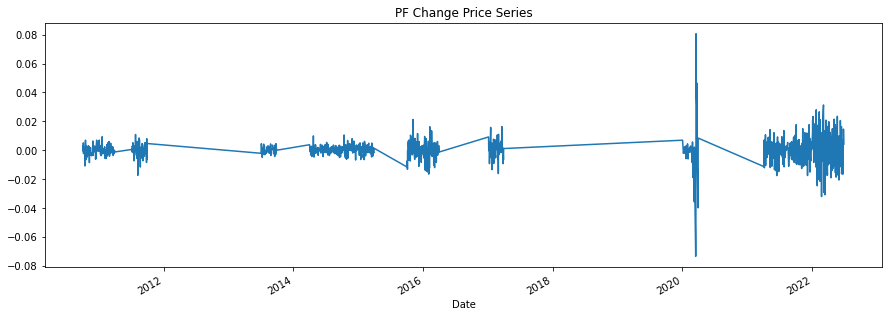

<AxesSubplot:>

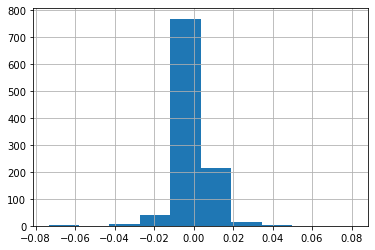

In [50]:
#set percentile according to Bruno et al.
percentile = 0.3

#get length of columns for n of top percentile and worst percentile
n_picks = int(len(ds_betas.columns)*percentile)

#create empty data frame that will be filled with daily portfolio returns
ds_beta_sp500_fact = pd.DataFrame()


# Use the .dt.is_quarter_end accessor to find the dates that are quarter ends
quarter_end_dates = sp500[sp500.index.is_quarter_end]


for i, row in quarter_end_dates.iterrows():

    #from ESG dataframe for index i take n largest and n smallest scores and convert to list    
    top_list = ds_betas[ds_betas.loc[i].nlargest(n_picks).index].columns.tolist()
    top_list = [x for x in top_list if x in sp500.columns.to_list()]
    worst_list = ds_betas[ds_betas.loc[i].nsmallest(n_picks).index].columns.tolist()
    worst_list = [x for x in worst_list if x in sp500.columns.to_list()]
    
    
    #set date range to slice df with prices
    date_range = pd.date_range(end = i,periods = 2, freq='Q')

    #slice prices dataframe for range of one quarter (portfolios are being rebalanced every year)
    temp_df = sp500.loc[date_range[0]:date_range[1]]
    
    
    #drop first row  of temp_df because it includes the last end-of-quarter date
    temp_df = temp_df.iloc[1: , :]
    
    
    
    #get pct_change of daily returns for temp_df
    temp_df = temp_df.pct_change()

 
        
    #add new column 'PF Change', which is the sum of the changes of the top list Tickers and the 
    #sum of the changes of the worst list times -1 
    temp_df['PF Change'] = temp_df.loc[:, top_list].mean(axis = 1) - temp_df.loc[:, worst_list].mean(axis = 1)
    

    ds_beta_sp500_fact = pd.concat([ds_beta_sp500_fact, temp_df['PF Change']]).sort_index()

ds_beta_sp500_fact = ds_beta_sp500_fact.rename(columns={0: 'PF Change'})
ds_beta_sp500_fact['PF Value'] = (ds_beta_sp500_fact['PF Change'] + 1).cumprod()
ds_beta_sp500_fact.index.name = 'Date'

statistics = ds_beta_sp500_fact['PF Change'].calc_stats()
statistics.display()

statistics.plot()
plt.show()

ds_beta_sp500_fact['PF Change'].hist()

In [51]:
# merge factor data and sp500 risk factor 
ff_CAPM_US_down = ff_daily_sp500.merge(ds_beta_sp500_fact['PF Change'],on='Date')
ff_CAPM_US_down = ff_CAPM_US_down.rename(columns={'PF Change': 'RISK'})

#merge factor data with the strategy returns df
ff_CAPM_US_down = ff_CAPM_US_down.merge(overall_sp500_perf[['ESG returns', 'E returns', 'S returns', 'G returns']],on='Date')

# resample to weekly data 
ff_CAPM_US_down_weekly = ff_CAPM_US_down.resample('W').last()
ff_CAPM_US_down_weekly


,Mkt-RF,SMB,HML,RMW,CMA,RF,WML,RISK,ESG returns,E returns,S returns,G returns
Date,,,,,,,,,,,,
2008-01-06,-0.0258,-0.0043,0.0033,-0.0005,0.0034,0.0001,-0.0018,NaN,0.005542,0.003622,0.002982,0.002594
2008-01-13,-0.0140,-0.0067,0.0042,-0.0011,-0.0024,0.0001,-0.0049,NaN,-0.000949,-0.002032,-0.001088,0.002315
2008-01-20,-0.0057,-0.0057,-0.0048,0.0063,-0.0037,0.0001,0.0067,NaN,-0.002342,-0.000658,-0.001627,-0.002011
2008-01-27,-0.0133,0.0101,0.0014,0.0009,-0.0004,0.0001,0.0065,NaN,-0.002357,-0.002806,-0.001666,-0.000810
2008-02-03,0.0153,0.0071,0.0018,-0.0041,-0.0035,0.0001,-0.0085,NaN,-0.002895,-0.002713,-0.002920,-0.001961
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-05,-0.0114,-0.0084,0.0169,0.0151,0.0177,0.0000,-0.0114,0.011852,0.000352,0.001932,0.002290,-0.000549
2021-12-12,0.0068,-0.0098,0.0057,0.0126,0.0094,0.0000,0.0088,-0.000987,-0.000505,0.000323,0.001133,0.000457
2021-12-19,-0.0069,0.0147,-0.0261,-0.0103,-0.0128,0.0000,-0.0144,-0.005040,0.000579,-0.001614,-0.000457,-0.000827


### CAPM + Risk Factor SP500

In [52]:
CAPM_risk_US = pd.DataFrame()

for i in ff_CAPM_US_down_weekly.columns[-4:].to_list():

    X = ff_CAPM_US_down_weekly[['Mkt-RF', 'RISK']]
    y = ff_CAPM_US_down_weekly[i] - ff_CAPM_US_down_weekly['RF']
    X = sm.add_constant(X)
    ff_model = sm.OLS(y, X, missing = 'drop').fit()
    print(ff_model.summary())
    intercept, b1, b2 = ff_model.params
    
    parameters = pd.concat([ff_model.params, ff_model.tvalues], axis=0, keys=['parameter', 't-value'])
    CAPM_risk_US = pd.concat([CAPM_risk_US, parameters], axis=1)
    
CAPM_risk_US

new_columns = ['ESG', 'E', 'S', 'G']
CAPM_risk_US.columns = [new_columns[i] for i in range(len(CAPM_risk_US.columns))]


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     23.18
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           9.23e-10
Time:                        16:00:28   Log-Likelihood:                 1036.3
No. Observations:                 199   AIC:                            -2067.
Df Residuals:                     196   BIC:                            -2057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001   9.46e-05     -1.417      0.1

C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [53]:
CAPM_risk_US

ESG         E         S         G
parameter const  -0.000134 -0.000266 -0.000129 -0.000126
          Mkt-RF  0.043342  0.089317  0.028706  0.052903
          RISK   -0.042051  0.005483 -0.000914 -0.011890
t-value   const  -1.416912 -2.436340 -1.290334 -1.448821
          Mkt-RF  4.817505  8.611347  3.017005  6.376409
          RISK   -2.455249  0.277694 -0.050457 -0.752812

### 6 Factor + RISK Factor SP500

In [54]:
six_fact_risk_US = pd.DataFrame()

for i in ff_CAPM_US_down_weekly.columns[-4:].to_list():
    
    X = ff_CAPM_US_down_weekly[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML', 'RISK']]
    y = ff_CAPM_US_down_weekly[i] - ff_CAPM_US_down_weekly['RF']
    X = sm.add_constant(X)
    ff_model = sm.OLS(y, X, missing = 'drop').fit()
    print(ff_model.summary())
    intercept, b1, b2, b3, b4, b5, b6, b7 = ff_model.params
    
    parameters = pd.concat([ff_model.params, ff_model.tvalues], axis=0, keys=['parameter', 't-value'])
    six_fact_risk_US = pd.concat([six_fact_risk_US, parameters], axis=1)
    
six_fact_risk_US

new_columns = ['ESG', 'E', 'S', 'G']
six_fact_risk_US.columns = [new_columns[i] for i in range(len(six_fact_risk_US.columns))]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     13.27
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           6.65e-14
Time:                        16:00:29   Log-Likelihood:                 1054.6
No. Observations:                 199   AIC:                            -2093.
Df Residuals:                     191   BIC:                            -2067.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001    8.9e-05     -1.685      0.0

C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [55]:
six_fact_risk_US

ESG          E         S         G
parameter const  -0.000150  -0.000231 -0.000179 -0.000082
          Mkt-RF  0.050358   0.096529  0.041930  0.054532
          SMB    -0.093202  -0.120204 -0.171451 -0.073097
          HML    -0.005493   0.059811 -0.037266  0.073672
          RMW    -0.010211  -0.001660 -0.049868 -0.005052
          CMA     0.049180   0.027113  0.058438 -0.066929
          WML    -0.034580  -0.080006 -0.046420 -0.048415
          RISK   -0.027006   0.024553  0.019910 -0.007965
t-value   const  -1.684902  -2.621910 -2.165950 -1.032009
          Mkt-RF  5.796554  11.234461  5.205230  7.070473
          SMB    -4.408221  -5.748396 -8.745622 -3.894297
          HML    -0.229230   2.523785 -1.677289  3.463195
          RMW    -0.344490  -0.056633 -1.814467 -0.191969
          CMA     1.404847   0.783097  1.800333 -2.153539
          WML    -2.372130  -5.549220 -3.434253 -3.741021
          RISK   -1.664653   1.530256  1.323569 -0.553026

### Calculate betas for Stoxx

In [56]:
#create dataframe (copy of stoxx daily returns)
stoxx_2 = stoxx.pct_change()

#merge the data with fama french Market return
stoxx_2 = stoxx_2.merge(ff_daily_stoxx['Mkt-RF'], on='Date')
stoxx_2.head()

,BOUY.PA,AMPF.MI,GETP.PA,HRGV.L,INGA.AS,BRBY.L,DIAS.MI,SCMN.S,ISP.MI,CABK.MC,...,KGX.DE,EPIRa.ST,GJFG.OL,NN.AS,ALEP.WA,PRX.AS,EVKn.DE,VNAn.DE,VPLAYb.ST,Mkt-RF
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0012
2008-01-03,-0.025678,-0.027978,-0.035808,-0.013947,-0.003830,-0.033569,0.003573,NaN,0.002452,-0.019231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0015
2008-01-04,-0.019439,-0.009792,0.005435,-0.004243,-0.016148,-0.033821,0.000000,-0.019563,-0.007526,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0175
2008-01-07,-0.001334,-0.037459,-0.054054,-0.009943,0.001563,-0.044465,-0.012045,0.008803,-0.001137,-0.029412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0081
2008-01-08,0.030731,-0.026463,-0.001905,-0.037303,-0.003512,-0.008911,0.007208,0.012798,-0.016132,0.010101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0072


In [57]:
betas_stoxx = pd.DataFrame()

for i in stoxx_2:

    # Calculate the rolling betas for the stocks in the stoxx for a period of 252 trading days
    betas_stoxx[i] = stoxx_2[i].rolling(252).cov(stoxx_2['Mkt-RF']) / stoxx_2['Mkt-RF'].rolling(252).var()

betas_stoxx.tail()

C:\Users\srhyn\AppData\Local\Temp/ipykernel_12132/2302876980.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  betas_stoxx[i] = stoxx_2[i].rolling(252).cov(stoxx_2['Mkt-RF']) / stoxx_2['Mkt-RF'].rolling(252).var()


,BOUY.PA,AMPF.MI,GETP.PA,HRGV.L,INGA.AS,BRBY.L,DIAS.MI,SCMN.S,ISP.MI,CABK.MC,...,KGX.DE,EPIRa.ST,GJFG.OL,NN.AS,ALEP.WA,PRX.AS,EVKn.DE,VNAn.DE,VPLAYb.ST,Mkt-RF
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-24,0.477050,0.942379,0.513272,0.669574,1.340781,1.093250,0.689195,0.094905,1.303818,0.990148,...,1.393471,0.895216,0.418039,0.970287,1.142485,1.477728,0.809024,0.768902,1.284102,1.0
2022-06-27,0.470504,0.943138,0.516665,0.671730,1.335212,1.088578,0.692371,0.095664,1.300601,0.984197,...,1.402102,0.901243,0.419162,0.967271,1.151206,1.516101,0.808969,0.768417,1.289564,1.0
2022-06-28,0.470473,0.944164,0.514975,0.669738,1.336378,1.087202,0.690576,0.094135,1.301803,0.984341,...,1.400968,0.896466,0.414433,0.965661,1.144921,1.515851,0.807083,0.767622,1.282422,1.0
2022-06-29,0.474106,0.938733,0.514328,0.671409,1.332815,1.072954,0.687456,0.092631,1.297012,0.978327,...,1.404130,0.895650,0.412241,0.965254,1.138343,1.496425,0.819799,0.772460,1.296385,1.0
2022-06-30,0.472519,0.965874,0.525470,0.668748,1.334452,1.069733,0.685796,0.086716,1.306169,0.981158,...,1.405894,0.905969,0.392219,0.960857,1.143113,1.498126,0.816274,0.777030,1.301360,1.0


In [58]:
#calculate beta for periods when market returns are below the rolling median 

beta_down_stoxx = pd.DataFrame()

mask = stoxx_2['Mkt-RF'] < stoxx_2['Mkt-RF'].rolling(252).median()
st_neg_market_returns = stoxx_2.loc[mask]

for i in st_neg_market_returns:
    
    # Calculate the rolling beta down, where the market return is below the median 
    beta_down_stoxx[i] = st_neg_market_returns[i].rolling(252).cov(st_neg_market_returns['Mkt-RF']) / st_neg_market_returns['Mkt-RF'].rolling(252).var()
    
beta_down_stoxx.tail()

C:\Users\srhyn\AppData\Local\Temp/ipykernel_12132/650925671.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  beta_down_stoxx[i] = st_neg_market_returns[i].rolling(252).cov(st_neg_market_returns['Mkt-RF']) / st_neg_market_returns['Mkt-RF'].rolling(252).var()


,BOUY.PA,AMPF.MI,GETP.PA,HRGV.L,INGA.AS,BRBY.L,DIAS.MI,SCMN.S,ISP.MI,CABK.MC,...,KGX.DE,EPIRa.ST,GJFG.OL,NN.AS,ALEP.WA,PRX.AS,EVKn.DE,VNAn.DE,VPLAYb.ST,Mkt-RF
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-22,0.680466,0.841301,0.643410,0.467930,1.532046,1.128183,0.441533,0.267459,1.428161,1.088139,...,1.326982,0.945516,0.452129,1.036221,NaN,0.883006,0.856669,0.850644,1.295897,1.0
2022-06-23,0.679100,0.844946,0.642325,0.480672,1.542158,1.116996,0.427758,0.270083,1.430724,1.080787,...,1.327682,0.952237,0.458094,1.056606,NaN,0.882645,0.865712,0.858236,1.300075,1.0
2022-06-28,0.681792,0.843440,0.643633,0.483192,1.533460,1.119780,0.430682,0.273201,1.432991,1.085503,...,1.325734,0.954034,0.464482,1.058589,NaN,0.882212,0.867479,0.857993,1.294574,1.0
2022-06-29,0.684920,0.838342,0.644228,0.480106,1.529654,1.112895,0.427854,0.273692,1.432419,1.080806,...,1.326176,0.950529,0.464824,1.054422,NaN,0.876886,0.877811,0.860085,1.299223,1.0
2022-06-30,0.681227,0.843242,0.647267,0.498524,1.523284,1.107567,0.441615,0.267806,1.439244,1.069617,...,1.316955,0.954991,0.458336,1.078695,NaN,0.887118,0.872036,0.868967,1.309411,1.0


In [59]:
ds_betas_stoxx = beta_down_stoxx - betas_stoxx
ds_betas_stoxx.tail()

,BOUY.PA,AMPF.MI,GETP.PA,HRGV.L,INGA.AS,BRBY.L,DIAS.MI,SCMN.S,ISP.MI,CABK.MC,...,KGX.DE,EPIRa.ST,GJFG.OL,NN.AS,ALEP.WA,PRX.AS,EVKn.DE,VNAn.DE,VPLAYb.ST,Mkt-RF
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-28,0.211318,-0.100724,0.128657,-0.186546,0.197083,0.032577,-0.259894,0.179066,0.131188,0.101161,...,-0.075234,0.057568,0.050049,0.092928,NaN,-0.633640,0.060396,0.090371,0.012152,3.330669e-15
2022-06-29,0.210814,-0.100391,0.129901,-0.191303,0.196838,0.039942,-0.259601,0.181060,0.135407,0.102479,...,-0.077954,0.054879,0.052583,0.089167,NaN,-0.619539,0.058011,0.087626,0.002837,3.663736e-15
2022-06-30,0.208707,-0.122632,0.121797,-0.170224,0.188832,0.037834,-0.244181,0.181090,0.133075,0.088460,...,-0.088938,0.049022,0.066117,0.117838,NaN,-0.611007,0.055762,0.091938,0.008051,3.108624e-15


### Downside Risk Factor Stoxx

Stats for PF Change from 2008-01-03 00:00:00 - 2022-06-30 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
-                  -0.08  -       -718.03%

Annualized Returns:
mtd       3m       6m        ytd       1y       3y      5y      10y    incep.
--------  -------  --------  --------  -------  ------  ------  -----  --------
-275.71%  376.00%  -661.71%  -661.71%  236.21%  49.02%  70.17%  -      -

Periodic:
        daily       monthly    yearly
------  ----------  ---------  --------
sharpe  -0.08       -1.11      -0.09
mean    -2750.05%   -2250.44%  -33.65%
vol     36642.32%   2024.40%   375.69%
skew    3.39        -3.62      1.01
kurt    149.10      23.78      4.12
best    35392.36%   1478.54%   802.91%
worst   -36485.36%  -3486.97%  -661.71%

Drawdowns:
max       avg         # days
--------  --------  --------
-718.03%  -255.79%    219.42

Misc:
---------------  --------
avg. u

C:\Users\srhyn\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\srhyn\anaconda3\lib\site-packages\ffn\core.py:1376: RuntimeWarning: invalid value encountered in double_scalars
  return (prices.iloc[-1] / prices.iloc[0]) ** (1 / year_frac(start, end)) - 1
C:\Users\srhyn\anaconda3\lib\site-packages\ffn\core.py:1376: RuntimeWarning: invalid value encountered in double_scalars
  return (prices.iloc[-1] / prices.iloc[0]) ** (1 / year_frac(start, end)) - 1


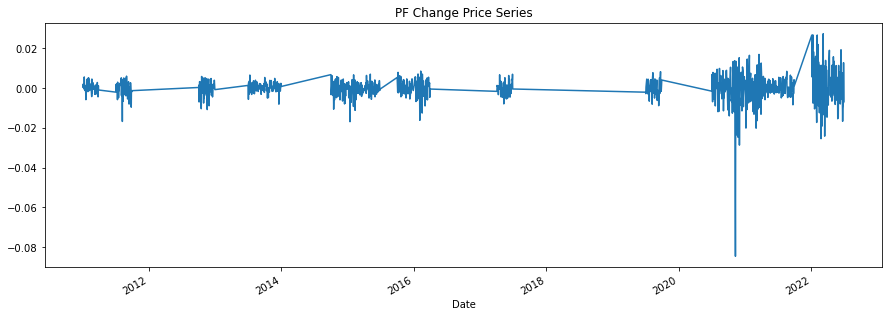

<AxesSubplot:>

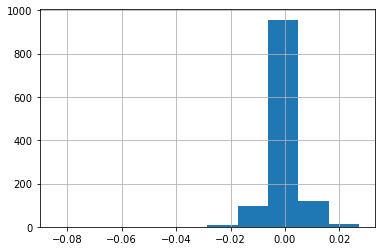

In [60]:
#set percentile according to Bruno et al.
percentile = 0.3

#get length of columns for n of top percentile and worst percentile
n_picks = int(len(ds_betas_stoxx.columns)*percentile)

#create empty data frame that will be filled with daily portfolio returns
ds_betas_stoxx_fact = pd.DataFrame()


# Use the .dt.is_quarter_end accessor to find the dates that are quarter ends
quarter_end_dates = stoxx[stoxx.index.is_quarter_end]


for i, row in quarter_end_dates.iterrows():

    #from ESG dataframe for index i take n largest and n smallest scores and convert to list    
    top_list = ds_betas_stoxx[ds_betas_stoxx.loc[i].nlargest(n_picks).index].columns.tolist()
    top_list = [x for x in top_list if x in stoxx.columns.to_list()]
    worst_list = ds_betas_stoxx[ds_betas_stoxx.loc[i].nsmallest(n_picks).index].columns.tolist()
    worst_list = [x for x in worst_list if x in stoxx.columns.to_list()]
    
    
    #set date range to slice df with prices
    date_range = pd.date_range(end = i,periods = 2, freq='Q')

    #slice prices dataframe for range of one quarter (portfolios are being rebalanced every year)
    temp_df = stoxx.loc[date_range[0]:date_range[1]]
    
    
    #drop first row  of temp_df because it includes the last end-of-quarter date
    temp_df = temp_df.iloc[1: , :]
    
    
    
    #get pct_change of daily returns for temp_df
    temp_df = temp_df.pct_change()

 
        
    #add new column 'PF Change', which is the sum of the changes of the top list Tickers and the 
    #sum of the changes of the worst list times -1 
    temp_df['PF Change'] = temp_df.loc[:, top_list].mean(axis = 1) - temp_df.loc[:, worst_list].mean(axis = 1)
    

    ds_betas_stoxx_fact = pd.concat([ds_betas_stoxx_fact, temp_df['PF Change']]).sort_index()

ds_betas_stoxx_fact = ds_betas_stoxx_fact.rename(columns={0: 'PF Change'})
ds_betas_stoxx_fact['PF Value'] = (ds_betas_stoxx_fact['PF Change'] + 1).cumprod()
ds_betas_stoxx_fact.index.name = 'Date'

statistics = ds_betas_stoxx_fact['PF Change'].calc_stats()
statistics.display()

statistics.plot()
plt.show()

ds_betas_stoxx_fact['PF Change'].hist()

In [61]:
# merge factor data and stoxx risk factor 
ff_CAPM_EU_down = ff_daily_stoxx.merge(ds_betas_stoxx_fact['PF Change'],on='Date')
ff_CAPM_EU_down = ff_CAPM_EU_down.rename(columns={'PF Change': 'RISK'})

#merge factor data with the strategy returns df
ff_CAPM_EU_down = ff_CAPM_EU_down.merge(overall_stoxx_perf[['ESG returns', 'E returns', 'S returns', 'G returns']],on='Date')

# resample to weekly data 
ff_CAPM_EU_down_weekly = ff_CAPM_EU_down.resample('W').last()
ff_CAPM_EU_down_weekly


,Mkt-RF,SMB,HML,RMW,CMA,RF,WML,RISK,ESG returns,E returns,S returns,G returns
Date,,,,,,,,,,,,
2008-01-06,-0.0175,0.0041,0.0032,-0.0025,0.0013,0.0001,0.0072,NaN,-0.001440,-0.002396,-0.000145,0.000854
2008-01-13,-0.0073,-0.0022,0.0066,-0.0047,-0.0016,0.0001,-0.0116,NaN,-0.000091,0.000802,-0.001527,0.001344
2008-01-20,-0.0102,0.0019,-0.0093,0.0044,-0.0003,0.0001,0.0093,NaN,-0.002736,-0.002111,-0.002847,-0.002767
2008-01-27,-0.0018,0.0087,-0.0060,0.0035,-0.0007,0.0001,0.0143,NaN,-0.000187,-0.001671,-0.000022,-0.002270
2008-02-03,0.0142,-0.0037,-0.0010,0.0021,-0.0038,0.0001,-0.0035,NaN,-0.001113,0.000466,-0.002017,-0.000701
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-05,-0.0070,-0.0035,0.0057,-0.0004,0.0050,0.0000,-0.0001,NaN,0.001304,0.001322,0.001692,0.002251
2021-12-12,-0.0014,0.0004,0.0045,0.0006,0.0058,0.0000,-0.0006,NaN,0.001276,0.002106,0.003264,0.000532
2021-12-19,-0.0131,0.0065,-0.0023,-0.0024,0.0033,0.0000,-0.0147,NaN,-0.000114,-0.002032,-0.000673,-0.000695


### CAPM + Risk Factor Stoxx

In [62]:
CAPM_risk_EU = pd.DataFrame()

for i in ff_CAPM_EU_down_weekly.columns[-4:].to_list():

    X = ff_CAPM_EU_down_weekly[['Mkt-RF', 'RISK']]
    y = ff_CAPM_EU_down_weekly[i] - ff_CAPM_EU_down_weekly['RF']
    X = sm.add_constant(X)
    ff_model = sm.OLS(y, X, missing = 'drop').fit()
    print(ff_model.summary())
    intercept, b1, b2 = ff_model.params
    
    parameters = pd.concat([ff_model.params, ff_model.tvalues], axis=0, keys=['parameter', 't-value'])
    CAPM_risk_EU = pd.concat([CAPM_risk_EU, parameters], axis=1)
    
CAPM_risk_EU

new_columns = ['ESG', 'E', 'S', 'G']
CAPM_risk_EU.columns = [new_columns[i] for i in range(len(CAPM_risk_EU.columns))]


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     14.23
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           1.52e-06
Time:                        16:00:32   Log-Likelihood:                 1242.3
No. Observations:                 227   AIC:                            -2479.
Df Residuals:                     224   BIC:                            -2468.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002    6.8e-05     -3.270      0.0

C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [63]:
CAPM_risk_EU

ESG         E         S         G
parameter const  -0.000222 -0.000396 -0.000391 -0.000289
          Mkt-RF  0.035602  0.069773  0.035953  0.040621
          RISK   -0.005533 -0.198556 -0.153054 -0.093990
t-value   const  -3.270422 -3.479411 -4.213371 -4.187086
          Mkt-RF  4.897983  5.736466  3.620036  5.500299
          RISK   -0.313508 -6.722964 -6.346553 -5.241238

### 6 Factor + Risk Stoxx

In [64]:
six_fact_risk_EU = pd.DataFrame()

for i in ff_CAPM_EU_down_weekly.columns[-4:].to_list():
    
    X = ff_CAPM_EU_down_weekly[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML', 'RISK']]
    y = ff_CAPM_EU_down_weekly[i] - ff_CAPM_EU_down_weekly['RF']
    X = sm.add_constant(X)
    ff_model = sm.OLS(y, X, missing = 'drop').fit()
    print(ff_model.summary())
    intercept, b1, b2, b3, b4, b5, b6, b7 = ff_model.params
    
    
    parameters = pd.concat([ff_model.params, ff_model.tvalues], axis=0, keys=['parameter', 't-value'])
    six_fact_risk_EU = pd.concat([six_fact_risk_EU, parameters], axis=1)
    
six_fact_risk_EU

new_columns = ['ESG', 'E', 'S', 'G']
six_fact_risk_EU.columns = [new_columns[i] for i in range(len(six_fact_risk_EU.columns))]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     13.80
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           9.07e-15
Time:                        16:00:32   Log-Likelihood:                 1270.2
No. Observations:                 227   AIC:                            -2524.
Df Residuals:                     219   BIC:                            -2497.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.284e-05   6.31e-05     -1.471      0.1

C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\srhyn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [65]:
six_fact_risk_EU

ESG         E         S         G
parameter const  -0.000093 -0.000152 -0.000169 -0.000159
          Mkt-RF  0.004509  0.010977 -0.012601  0.009899
          SMB    -0.119780 -0.173047 -0.169139 -0.105127
          HML     0.044158  0.264811  0.169283  0.097643
          RMW     0.098646  0.018672  0.139984  0.040218
          CMA     0.053520  0.070991  0.102848  0.071776
          WML    -0.004915  0.011278 -0.004512  0.013521
          RISK    0.026297 -0.056711 -0.053304 -0.039728
t-value   const  -1.471095 -2.170138 -2.333926 -2.647519
          Mkt-RF  0.540874  1.188445 -1.314731  1.251178
          SMB    -6.633360 -8.649773 -8.147491 -6.134934
          HML     1.660739  8.989047  5.537708  3.869677
          RMW     2.696307  0.460654  3.328142  1.158400
          CMA     1.669687  1.998990  2.790894  2.359609
          WML    -0.371076  0.768527 -0.296314  1.075728
          RISK    1.435001 -2.793219 -2.530110 -2.284494

### separate returns for long and short positions

SP500

In [66]:
#set percentile according to Bruno et al.
percentile = 0.3

#get length of columns for n of top percentile and worst percentile
n_picks = int(len(sp500.columns)*percentile)

#create empty data frame that will be filled with portfolio returns and cumulative returns
esg_sp500_perf = pd.DataFrame()
e_sp500_perf = pd.DataFrame()
s_sp500_perf = pd.DataFrame()
g_sp500_perf = pd.DataFrame()

#create overall performance portfolio
overall_sp500_perf = pd.DataFrame()

#store esg score data frames and performance dataframes in list, to simultaneously iterate through them
perf_list = [esg_sp500_perf, e_sp500_perf, s_sp500_perf, g_sp500_perf]
esg_list  = [esg_sp500, e_sp500, s_sp500, g_sp500]


for perf_df, esg_df in zip(perf_list, esg_list):
    
   

    for i, row in esg_df.iterrows():

        #from ESG dataframe for index i (each year) take n largest and n smallest scores and convert to list    
        top_list = esg_df[esg_df.loc[i].nlargest(n_picks).index].columns.tolist()
        top_list = [x for x in top_list if x in sp500.columns.to_list()]
        worst_list = esg_df[esg_df.loc[i].nsmallest(n_picks).index].columns.tolist()
        worst_list = [x for x in worst_list if x in sp500.columns.to_list()]

        #set date range to slice sp500 df 
        date_range = pd.date_range(end = i,periods = 2, freq='Y')

        #slice prices dataframe for range of one year (yearly ESG data, portfolios are being rebalanced every year)
        temp_df = sp500.loc[date_range[0]:date_range[1]]
        

        #drop first row  of temp_df because it includes the last end-of-year date
        temp_df = temp_df.iloc[1: , :]

        
        overall_list = top_list + worst_list

        #get pct_change of daily returns for temp_df
        temp_df = temp_df.pct_change()
        
  
        
        temp_df[worst_list] = temp_df[worst_list].mul(-1, axis=0)
        


        #add new column 'PF Change', which is the portfolio performance (performance long - performance short stocks)
        temp_df['PF Change'] = temp_df.loc[:, overall_list].mean(axis = 1)
        temp_df['PF Long'] = temp_df.loc[:, top_list].mean(axis = 1)
        temp_df['PF Short'] = temp_df.loc[:, worst_list].mean(axis = 1)

    
        #concatenate each year to the perf_df
        perf_df = pd.concat([temp_df, perf_df]).sort_index()

    #calculate portfolio value using cumprod        
    perf_df['PF Value'] = (perf_df['PF Change'] + 1).cumprod()
    
    #drop all columns but last two 
    perf_df = perf_df.iloc[:, -4:]
    
    overall_sp500_perf = pd.concat([overall_sp500_perf, perf_df], axis=1)
    
    
    print(perf_df.shape)

#rename columns   
new_columns = ['ESG returns', 'ESG long', 'ESG short', 'ESG Value','E returns', 'E long', 'E short','E Value','S returns', 'S long', 'S short',  'S Value', 'G returns', 'G long', 'G short',  'G Value']
overall_sp500_perf.columns = [new_columns[i] for i in range(len(overall_sp500_perf.columns))]

overall_sp500_perf

(3522, 4)
(3522, 4)
(3522, 4)
(3522, 4)


,ESG returns,ESG long,ESG short,ESG Value,E returns,E long,E short,E Value,S returns,S long,S short,S Value,G returns,G long,G short,G Value
Date,,,,,,,,,,,,,,,,
2008-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,0.005542,-0.021473,0.033942,1.005542,0.003622,-0.022965,0.031798,1.003622,0.002982,-0.023250,0.029432,1.002982,0.002594,-0.023793,0.029853,1.002594
2008-01-07,0.006274,0.007775,0.004697,1.011851,0.002641,0.002824,0.002446,1.006272,0.002840,0.003903,0.001768,1.005830,0.004325,0.006250,0.002338,1.006931
2008-01-08,0.004449,-0.015007,0.024902,1.016352,0.002915,-0.014862,0.021755,1.009205,0.003233,-0.017232,0.023869,1.009082,0.002291,-0.016133,0.021325,1.009238
2008-01-09,-0.000547,0.008729,-0.010299,1.015797,0.000940,0.009234,-0.007851,1.010153,-0.000048,0.009354,-0.009529,1.009034,0.001507,0.010699,-0.007989,1.010759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.002518,0.014737,-0.011153,0.867292,-0.000253,0.011480,-0.014646,0.693817,0.000598,0.013075,-0.012745,0.791033,0.002607,0.015737,-0.010778,0.944201
2021-12-28,-0.000387,0.001716,-0.002741,0.866956,0.001427,0.003938,-0.001655,0.694806,-0.000055,0.001963,-0.002213,0.790989,-0.000378,0.001463,-0.002254,0.943845
2021-12-29,0.000961,0.004171,-0.002631,0.867788,0.000005,0.002682,-0.003279,0.694810,-0.000308,0.002642,-0.003463,0.790746,0.000575,0.003145,-0.002046,0.944387


In [67]:
Longshort= ['ESG long', 'ESG short', 'E long', 'E short', 'S long', 'S short', 'G long', 'G short']

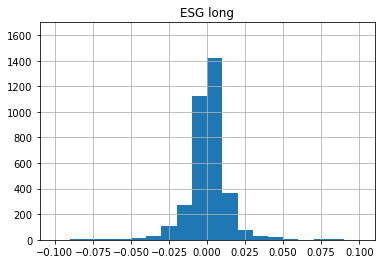

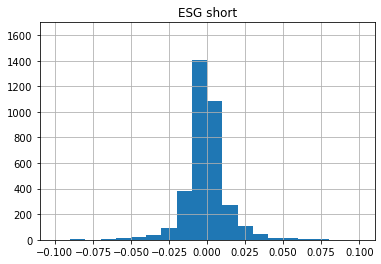

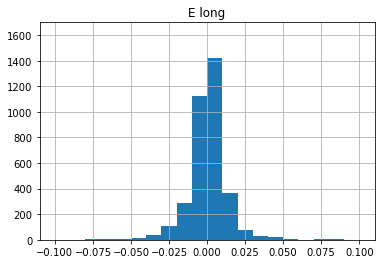

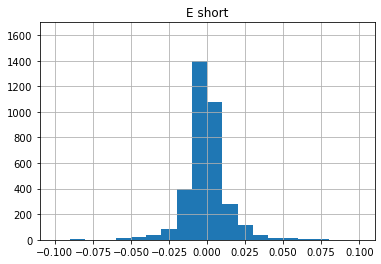

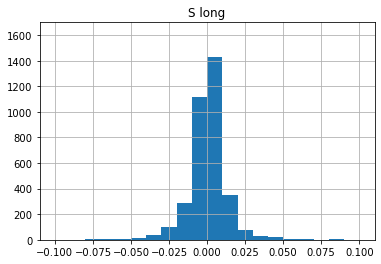

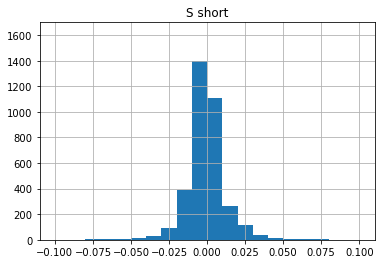

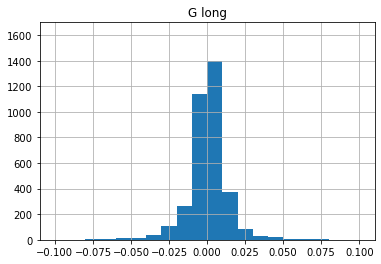

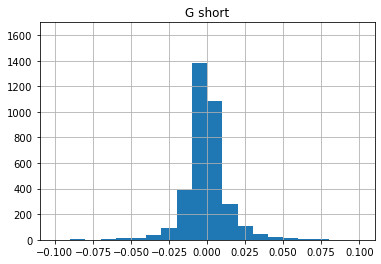

In [68]:
x_range = (-0.1, 0.1)
y_range = (0, 1700)

for i in Longshort:
    overall_sp500_perf[i].hist(bins = 20, range =
                               x_range)
    plt.title(i)
    plt.ylim(y_range)
    plt.show()

Stoxx

In [69]:
#set percentile according to Bruno et al.
percentile = 0.3

#get length of columns for n of top percentile and worst percentile
n_picks = int(len(stoxx.columns)*percentile)

#create empty data frame that will be filled with portfolio returns and cumulative returns
esg_stoxx_perf = pd.DataFrame()
e_stoxx_perf = pd.DataFrame()
s_stoxx_perf = pd.DataFrame()
g_stoxx_perf = pd.DataFrame()

#create overall performance portfolio
overall_stoxx_perf = pd.DataFrame()

#store esg score data frames and performance dataframes in list, to simultaneously iterate through them
perf_list = [esg_stoxx_perf, e_stoxx_perf, s_stoxx_perf, g_stoxx_perf]
esg_list  = [esg_stoxx, e_stoxx, s_stoxx, g_stoxx]


for perf_df, esg_df in zip(perf_list, esg_list):
    
   

    for i, row in esg_df.iterrows():

        #from ESG dataframe for index i (each year) take n largest and n smallest scores and convert to list    
        top_list = esg_df[esg_df.loc[i].nlargest(n_picks).index].columns.tolist()
        top_list = [x for x in top_list if x in stoxx.columns.to_list()]
        worst_list = esg_df[esg_df.loc[i].nsmallest(n_picks).index].columns.tolist()
        worst_list = [x for x in worst_list if x in stoxx.columns.to_list()]

        #set date range to slice sp500 df 
        date_range = pd.date_range(end = i,periods = 2, freq='Y')

        #slice prices dataframe for range of one year (yearly ESG data, portfolios are being rebalanced every year)
        temp_df = stoxx.loc[date_range[0]:date_range[1]]
        

        #drop first row  of temp_df because it includes the last end-of-year date
        temp_df = temp_df.iloc[1: , :]

        
        overall_list = top_list + worst_list

        #get pct_change of daily returns for temp_df
        temp_df = temp_df.pct_change()
        
  
        
        temp_df[worst_list] = temp_df[worst_list].mul(-1, axis=0)
        


        #add new column 'PF Change', which is the portfolio performance (performance long - performance short stocks)
        temp_df['PF Change'] = temp_df.loc[:, overall_list].mean(axis = 1)
        temp_df['PF Long'] = temp_df.loc[:, top_list].mean(axis = 1)
        temp_df['PF Short'] = temp_df.loc[:, worst_list].mean(axis = 1)

    
        #concatenate each year to the perf_df
        perf_df = pd.concat([temp_df, perf_df]).sort_index()

    #calculate portfolio value using cumprod        
    perf_df['PF Value'] = (perf_df['PF Change'] + 1).cumprod()
    
    #drop all columns but last two 
    perf_df = perf_df.iloc[:, -4:]
    
    overall_stoxx_perf = pd.concat([overall_stoxx_perf, perf_df], axis=1)
    
    
    print(perf_df.shape)

#rename columns   
new_columns = ['ESG returns', 'ESG long', 'ESG short', 'ESG Value','E returns', 'E long', 'E short','E Value','S returns', 'S long', 'S short',  'S Value', 'G returns', 'G long', 'G short',  'G Value']
overall_stoxx_perf.columns = [new_columns[i] for i in range(len(overall_stoxx_perf.columns))]

overall_stoxx_perf

(3582, 4)
(3582, 4)
(3582, 4)
(3582, 4)


,ESG returns,ESG long,ESG short,ESG Value,E returns,E long,E short,E Value,S returns,S long,S short,S Value,G returns,G long,G short,G Value
Date,,,,,,,,,,,,,,,,
2008-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,-0.001440,-0.023870,0.021919,0.998560,-0.002396,-0.024592,0.020990,0.997604,-0.000145,-0.023582,0.023159,0.999855,0.000854,-0.022059,0.024440,1.000854
2008-01-07,0.003326,-0.009979,0.017182,1.001881,0.002099,-0.010393,0.015261,0.999698,0.004970,-0.009333,0.019193,1.004824,0.004426,-0.008782,0.018023,1.005283
2008-01-08,0.000119,0.005298,-0.005274,1.002001,0.000173,0.005074,-0.004991,0.999871,0.002292,0.007518,-0.002904,1.007127,-0.000320,0.004918,-0.005712,1.004962
2008-01-09,0.003407,-0.015054,0.022633,1.005414,0.001336,-0.017568,0.021253,1.001208,0.003945,-0.015669,0.023449,1.011101,0.003801,-0.014549,0.022691,1.008782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.000199,0.005751,-0.005482,0.805999,-0.000777,0.005193,-0.007175,0.610303,-0.000180,0.005706,-0.006067,0.672505,-0.001005,0.004869,-0.007123,0.682876
2021-12-28,-0.000310,0.003861,-0.004577,0.805749,0.000131,0.004742,-0.004810,0.610383,0.000714,0.004778,-0.003351,0.672985,-0.000767,0.003974,-0.005705,0.682352
2021-12-29,-0.000065,0.001782,-0.001955,0.805697,-0.001038,0.001021,-0.003245,0.609749,-0.002128,0.000022,-0.004278,0.671552,-0.000271,0.001044,-0.001640,0.682167


In [70]:
print(overall_stoxx_perf.columns.to_list())

['ESG returns', 'ESG long', 'ESG short', 'ESG Value', 'E returns', 'E long', 'E short', 'E Value', 'S returns', 'S long', 'S short', 'S Value', 'G returns', 'G long', 'G short', 'G Value']


In [71]:
Longshort= ['ESG long', 'ESG short', 'E long', 'E short', 'S long', 'S short', 'G long', 'G short']

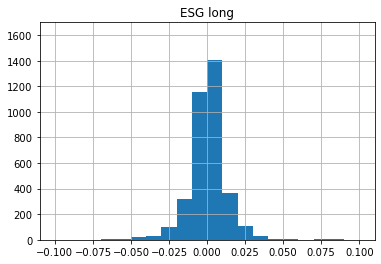

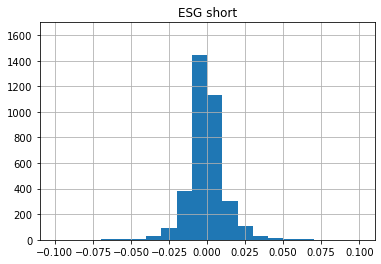

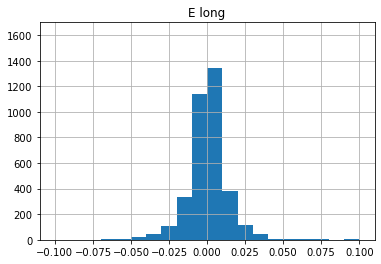

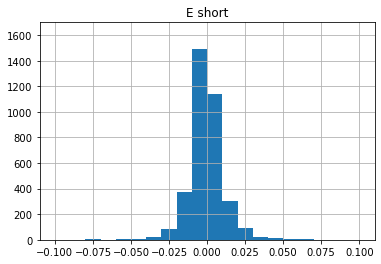

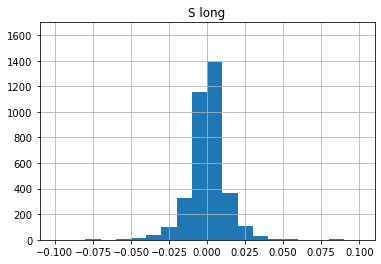

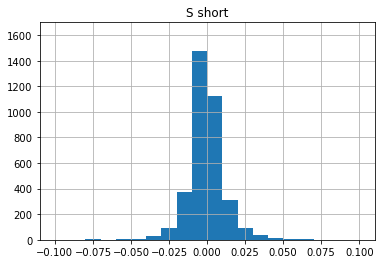

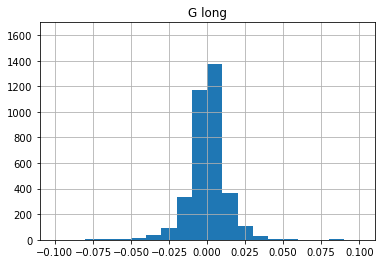

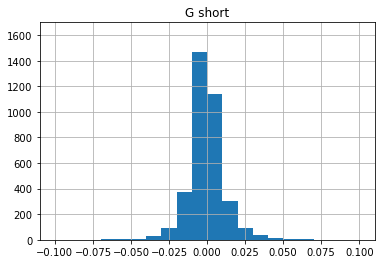

In [72]:
x_range = (-0.1, 0.1)
y_range = (0, 1700)

for i in Longshort:
    overall_stoxx_perf[i].hist(bins = 20, range =
                               x_range)
    plt.title(i)
    plt.ylim(y_range)
    plt.show()
    